In [ ]:
# Import necessary libraries
from sklearn.cluster import KMeans  # Import KMeans module from scikit-learn for clustering
import numpy as np  # Import NumPy for numerical computations
import pandas as pd  # Import Pandas for data manipulation and analysis

In [ ]:
# Load the diabetes dataset from Google Drive
diabetes = pd.read_csv('/content/sample_data/diabetes.csv')
diabetes = diabetes.drop(columns=['Outcome'])

In [ ]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
# Initialize and fit KMeans object
kmeans = KMeans(n_clusters=6, random_state=42)  # Specify the number of clusters (k)
kmeans.fit(diabetes)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [ ]:
# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_  # Get the coordinates of cluster centers
labels = kmeans.labels_  # Get the cluster labels for each data point


In [ ]:
# Print cluster centers and labels
print("Cluster Centers:")
print(cluster_centers)
print("\nCluster Labels:")
print(labels)

Cluster Centers:
[[4.04330709e+00 9.93425197e+01 6.27401575e+01 1.31535433e+01
  2.02362205e+00 2.95677165e+01 3.98732283e-01 3.22677165e+01]
 [4.24444444e+00 1.50755556e+02 7.37777778e+01 3.02444444e+01
  3.01177778e+02 3.55733333e+01 5.66666667e-01 3.40666667e+01]
 [3.76811594e+00 1.34094203e+02 7.19202899e+01 3.11086957e+01
  1.67811594e+02 3.43565217e+01 5.54028986e-01 3.31376812e+01]
 [3.11111111e+00 1.65833333e+02 7.34444444e+01 3.56666667e+01
  5.48833333e+02 3.69611111e+01 6.60666667e-01 3.45555556e+01]
 [2.81502890e+00 1.04381503e+02 6.89479769e+01 2.70809249e+01
  8.16011561e+01 3.12115607e+01 4.80104046e-01 2.83526012e+01]
 [4.80000000e+00 1.52014286e+02 7.60142857e+01 1.03571429e+01
  4.64285714e-01 3.32371429e+01 4.58692857e-01 4.07142857e+01]]

Cluster Labels:
[5 0 5 4 2 0 4 0 3 5 0 5 5 3 2 0 2 0 4 4 2 0 5 0 2 4 5 2 4 0 0 1 4 0 0 2 5
 0 0 2 4 5 0 1 5 5 5 0 0 0 4 0 0 1 1 0 1 4 5 2 0 5 0 2 0 0 0 0 0 4 4 2 5 1
 0 0 0 0 0 0 0 0 4 0 5 4 0 4 4 0 0 2 4 5 4 2 0 4 4 2 5 5 5 0 0 2 

In [ ]:
# If you want to assign the labels to the original dataframe
diabetes['Cluster'] = labels  # Create a new column 'Cluster' in the dataframe and assign cluster labels


In [ ]:

# Import necessary libraries for visualization
import matplotlib.pyplot as plt

In [ ]:
# Choose two features for plotting (e.g., Glucose and BMI)
feature1 = 'Glucose'
feature2 = 'BMI'

In [ ]:
# Extract the chosen features from the dataset
x_feature = diabetes[feature1]
y_feature = diabetes[feature2]

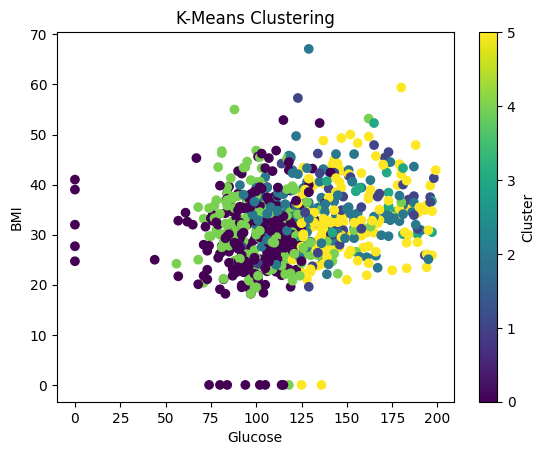

In [ ]:
# Plot the data points, colored by cluster label
plt.scatter(x_feature, y_feature, c=diabetes['Cluster'], cmap='viridis')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Apply PCA to reduce dimensionality to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
diabetes_pca = pca.fit_transform(diabetes)


In [ ]:
# Initialize and fit KMeans object
kmeans_all = KMeans(n_clusters=2, random_state=42)  # Specify the number of clusters (k)
kmeans_all.fit(diabetes_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [ ]:
# Get cluster labels
labels_all = kmeans_all.labels_


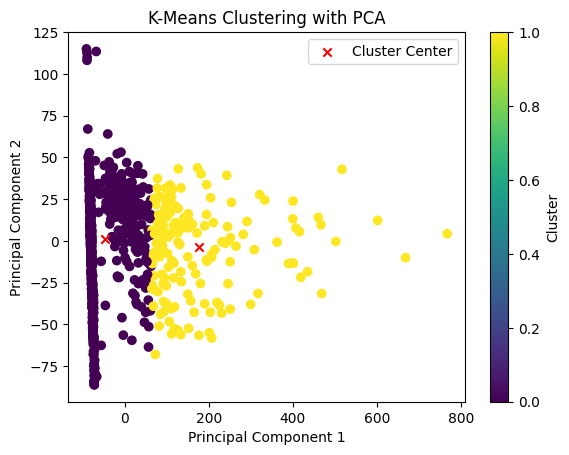

In [ ]:
# Plot the clustered data in 2D
plt.scatter(diabetes_pca[:, 0], diabetes_pca[:, 1], c=labels_all, cmap='viridis', marker='o')
plt.scatter(kmeans_all.cluster_centers_[:, 0], kmeans_all.cluster_centers_[:, 1], c='red', marker='x', label='Cluster Center')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()